<a href="https://colab.research.google.com/github/berniwal/CIL_Project/blob/master/Albert1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Go to correct directory

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.getcwd()
os.chdir('/content/drive/My Drive/CIL')
os.getcwd()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'/content/drive/My Drive/CIL'

## install + import libraries

In [2]:
!pip install params_flow==0.7.1
!pip install py-params==0.7.3
!pip install sentencepiece
import sentencepiece as spm
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import os
from datetime import datetime

import bert
#different Tokenizer for Albert
from bert.tokenization.bert_tokenization import FullTokenizer
from bert.tokenization.albert_tokenization import AlbertFullTokenizer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert import BertModelLayer
import sentencepiece as spm

from tqdm import tqdm
import numpy as np

from sklearn.utils import shuffle

  Created wheel for params-flow: filename=params_flow-0.7.1-cp36-none-any.whl size=15376 sha256=89da3b299173379c8896232fd4692fabbafd947f25904da98b0993f0cb0f9038
  Stored in directory: /root/.cache/pip/wheels/e2/7b/2a/b411aaa219132a68b17937fc9431fd9eb9c23c12a7df3d134f
  Created wheel for py-params: filename=py_params-0.9.7-cp36-none-any.whl size=7302 sha256=b16661f88156c11c8a7384445a45f1c9f7552cf0109e6a492b04b7856defc498
  Stored in directory: /root/.cache/pip/wheels/67/f5/19/b461849a50aefdf4bab47c4756596e82ee2118b8278e5a1980
Successfully built params-flow py-params
  Created wheel for py-params: filename=py_params-0.7.3-cp36-none-any.whl size=4346 sha256=6d7e8e30fee2ca51f400be5392eb55b3f8c4bc6d3f4565aab238c5cbffdbabd6
  Stored in directory: /root/.cache/pip/wheels/a3/9f/a1/e7e79bd92eecef952a46b16d0bc93ffdc91d4b619f79777d27
Successfully built py-params
  Found existing installation: py-params 0.9.7
    Uninstalling py-params-0.9.7:
      Successfully uninstalled py-params-0.9.7
     |██

INFO:tensorflow:Initializing the TPU system: grpc://10.107.176.50:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


## Fix Directories for BERT
First part of selecting which model

In [3]:
# 'bert' or 'bert_large' or 'albert'
MODEL = 'albert'
ADDITIONAL_DATA = False
identifier='First_XLARGE' # for naming the output csv, weights and validation scores for graph

# '' or '_monoise' or '_monoise_b'
DATASET_PREPROCESSING = '' 

#Learning parameters
epochs = 4
last_val_loss = None
patience = 5
no_improvement_since = 0
current_learning_rate = 1e-5
minimum_learning_rate = 1e-7
reload_training = False
reload_checkpoint = './twitter_bert_large_second.h5'

CHECKPOINT = None
CHECKPOINT_CKPT = None
CHECKPOINT_VOCAB = None
CHECKPOINT_CONFIG = None

if MODEL == 'bert':
  CHECKPOINT = './bert/checkpoints/bert_base'
if MODEL == 'bert_large':
  CHECKPOINT = './bert/checkpoints/bert_large_wwm'
if MODEL == 'albert':
  CHECKPOINT = './bert/checkpoints/albert_xlarge'

if MODEL == 'bert' or MODEL == 'bert_large':
  CHECKPOINT_CKPT = os.path.join(CHECKPOINT, 'bert_model.ckpt')
  CHECKPOINT_VOCAB = os.path.join(CHECKPOINT, 'vocab.txt')
  CHECKPOINT_CONFIG = os.path.join(CHECKPOINT, 'bert_config.json')
if MODEL == 'albert':
  CHECKPOINT_VOCAB = os.path.join(CHECKPOINT, '30k-clean.model')
  CHECKPOINT_CKPT = os.path.join(CHECKPOINT, 'model.ckpt-best')
  CHECKPOINT_CONFIG = os.path.join(CHECKPOINT, 'albert_config.json')

DATASET_DIR = './'
DATASET_FILE_TRAIN_NEG = os.path.join(DATASET_DIR, 'twitter-datasets/train_neg_full{}.txt'.format(DATASET_PREPROCESSING))
DATASET_FILE_TRAIN_POS = os.path.join(DATASET_DIR, 'twitter-datasets/train_pos_full{}.txt'.format(DATASET_PREPROCESSING))
DATASET_FILE_TEST = os.path.join(DATASET_DIR, 'twitter-datasets/test_data{}.txt'.format(DATASET_PREPROCESSING))

DATASET_FILE_NEG_EXTRA = os.path.join(DATASET_DIR, 'twitter-datasets/extra_neg{}.txt'.format(DATASET_PREPROCESSING))
DATASET_FILE_POS_EXTRA = os.path.join(DATASET_DIR, 'twitter-datasets/extra_pos{}.txt'.format(DATASET_PREPROCESSING))

FILE_PATHS = [DATASET_FILE_TRAIN_POS, DATASET_FILE_TRAIN_NEG]

steps = None
if ADDITIONAL_DATA:
  steps = 336
else:
  steps = 200

## methods to create BERT layer
change name="albert" for other model, have to adjust paths above too

In [4]:
def flatten_layers(root_layer):
    if isinstance(root_layer, keras.layers.Layer):
        yield root_layer
    for layer in root_layer._layers:
        for sub_layer in flatten_layers(layer):
            yield sub_layer


def freeze_bert_layers(l_bert):
    """
    Freezes all but LayerNorm and adapter layers - see arXiv:1902.00751.
    """
    for layer in flatten_layers(l_bert):
        if layer.name in ["LayerNorm", "adapter-down", "adapter-up"]:
            layer.trainable = True
        elif len(layer._layers) == 0:
            layer.trainable = False
        l_bert.embeddings_layer.trainable = False


def create_learning_rate(learn_rate=5e-5):

    def lr_scheduler(epoch):
        return float(learn_rate)
    learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)

    return learning_rate_scheduler

def create_learning_rate_scheduler(max_learn_rate=5e-5,
                                   end_learn_rate=1e-7,
                                   warmup_epoch_count=10,
                                   total_epoch_count=90):

    def lr_scheduler(epoch):
        if epoch < warmup_epoch_count:
            #res = (max_learn_rate/warmup_epoch_count) * (epoch + 1)
            res = end_learn_rate
        else:
            res = max_learn_rate*math.exp(math.log(end_learn_rate/max_learn_rate)*(epoch-warmup_epoch_count+1)/(total_epoch_count-warmup_epoch_count+1))
        return float(res)
    learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)

    return learning_rate_scheduler


def create_model(max_seq_len, adapter_size=64):
    """Creates a classification model."""

    # adapter_size = 64  # see - arXiv:1902.00751

    # create the bert layer
    with tf.io.gfile.GFile(CHECKPOINT_CONFIG, "r") as reader:
        #Download from Google
        #model_dir    = bert.fetch_tfhub_albert_model(model_name, ".models")
        #bert_params = bert.albert_params(model_name)
        #bert_l = BertModelLayer.from_params(bert_params, name="albert", shared_layer=True, embedding_size=128)
        
        bc = StockBertConfig.from_json_string(reader.read())
        bert_params = map_stock_config_to_params(bc)
        bert_params.adapter_size = adapter_size
        bert_l = None
        if MODEL[:4] == 'bert':
          bert_l = BertModelLayer.from_params(bert_params, name="bert")
        else:
          bert_l = BertModelLayer.from_params(bert_params, name="albert", shared_layer=True, embedding_size=128)

    input_ids = keras.layers.Input(shape=(max_seq_len,), dtype='int32', name="input_ids")
    # token_type_ids = keras.layers.Input(shape=(max_seq_len,), dtype='int32', name="token_type_ids")
    # output         = bert([input_ids, token_type_ids])
    output = bert_l(input_ids)

    print("bert shape", output.shape)
    cls_out = keras.layers.Lambda(lambda seq: seq[:, 0, :])(output)
    cls_out = keras.layers.Dropout(0.5)(cls_out)
    logits = keras.layers.Dense(units=768, activation="tanh")(cls_out)
    logits = keras.layers.Dropout(0.5)(logits)
    logits = keras.layers.Dense(units=2, activation="softmax")(logits)

    # model = keras.Model(inputs=[input_ids, token_type_ids], outputs=logits)
    # model.build(input_shape=[(None, max_seq_len), (None, max_seq_len)])
    model = keras.Model(inputs=input_ids, outputs=logits)
    model.build(input_shape=(None, max_seq_len))

    # load the pre-trained model weights
    if MODEL[:4] == 'bert':
      load_stock_weights(bert_l, CHECKPOINT_CKPT)
    else:
      bert.load_albert_weights(bert_l, CHECKPOINT_CKPT)

    # freeze weights if adapter-BERT is used
    if adapter_size is not None:
        freeze_bert_layers(bert_l)

    model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")])

    return model

# Define Dataloading Class
Also loading data into array


In [5]:
import logging
logging.getLogger("tensorflow").setLevel(logging.WARNING)

def load_data(file_path):
    data = {}
    data["sentence"] = []
    with open(file_path, "r") as f:
        data["sentence"] = f.readlines()

    #longest_string = max(data["sentence"], key=len)
    #print(longest_string)
    #print(len(longest_string))

    return pd.DataFrame.from_dict(data)

def load_dataset(pos_directory, neg_directory):
    pos_df = load_data(pos_directory)
    neg_df = load_data(neg_directory)

    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0

    return pd.concat([pos_df, neg_df])

class MovieReviewData:
    DATA_COLUMN = "sentence"
    LABEL_COLUMN = "sentiment"

    def __init__(self, tokenizer= FullTokenizer, max_seq_len=128, steps=200, extra_data=False):
        self.tokenizer = tokenizer
        self.step = None
        self.sample_size= 128*937
        self.max_seq_len = max_seq_len
        self.train_x = None
        self.train_x_token_types = None
        self.test_x = None
        self.test_x_token_types = None
        self.train_y = None
        self.test_y = None
        self.steps = steps
        self.extra_data = extra_data
        
    def _prepare(self, df):
        x, y = [], []
        with tqdm(total=df.shape[0], unit_scale=True) as pbar:
            for ndx, row in df.iterrows():
                text, label = row[MovieReviewData.DATA_COLUMN], row[MovieReviewData.LABEL_COLUMN]
                tokens = self.tokenizer.tokenize(text)
                tokens = ["[CLS]"] + tokens + ["[SEP]"]
                token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
                # self.max_seq_len = max(self.max_seq_len, len(token_ids))
                x.append(token_ids)
                y.append(int(label))
                pbar.update()
        return np.array(x), np.array(y)

    def _pad(self, ids):
        x, t = [], []
        token_type_ids = [0] * self.max_seq_len
        for input_ids in ids:
            input_ids = input_ids[:min(len(input_ids), self.max_seq_len - 2)]
            input_ids = input_ids + [0] * (self.max_seq_len - len(input_ids))
            x.append(np.array(input_ids))
            t.append(token_type_ids)
        return np.array(x), np.array(t)

    def load_data(self, step, update_test=True):
        trainset = load_dataset(DATASET_FILE_TRAIN_POS, DATASET_FILE_TRAIN_NEG)

        step = step % self.steps

        trainset = shuffle(trainset, random_state=5)
        #remove already processed data
        train = trainset.head(2400000)

        if self.extra_data:
          trainset_extra = load_dataset(DATASET_FILE_POS_EXTRA, DATASET_FILE_NEG_EXTRA)
          trainset_extra = shuffle(trainset_extra, random_state=5)
          train = pd.concat([train, trainset_extra], ignore_index=True)
        
        train = train.head(self.steps*128*93)
        train = train.tail(self.steps*128*93 - step*128*93)
        train = train.head(128*93)
        test = trainset.tail(100000)
        #train = trainset.head(10*128)
        #test = trainset.tail(10*128)

        train = shuffle(train)
        test = shuffle(test)

        train.reset_index(inplace=True, drop=True)
        test.reset_index(inplace=True, drop=True)

        if update_test:
          ((self.train_x, self.train_y),
          (self.test_x, self.test_y)) = map(self._prepare, [train, test])

          ((self.train_x, self.train_x_token_types),
          (self.test_x, self.test_x_token_types)) = map(self._pad,
                                                        [self.train_x, self.test_x])
        else:
          df_empty = pd.DataFrame({'empty' : []})
          ((self.train_x, self.train_y),
          (_, _)) = map(self._prepare, [train, df_empty])

          ((self.train_x, self.train_x_token_types),
          (_, _)) = map(self._pad, [self.train_x, []])

spm_model = None
sp = None

if MODEL == 'albert':
  spm_model = os.path.join('./bert/checkpoints/albert_xlarge/', "30k-clean.model")
  sp = spm.SentencePieceProcessor()
  sp.load(spm_model)

tokenizer = None
if MODEL[:4] == 'bert':
  tokenizer = FullTokenizer(vocab_file=CHECKPOINT_VOCAB, do_lower_case=True)
else:
  tokenizer = AlbertFullTokenizer(vocab_file=None, do_lower_case=True, spm_model_file=CHECKPOINT_VOCAB)

## BERT text preprocessing

In [6]:
def pre_process_positive(x, max_seq_len):
  tokens = tokenizer.tokenize(x.numpy())
  tokens = ["[CLS]"] + tokens + ["[SEP]"]
  token_ids = tokenizer.convert_tokens_to_ids(tokens)
  token_ids = token_ids[:min(len(token_ids), max_seq_len - 2)]
  token_ids = np.concatenate((token_ids, np.zeros((max_seq_len - len(token_ids))))).astype(np.int32)
  return token_ids, int(1)

def pre_process_negative(x, max_seq_len):
  tokens = tokenizer.tokenize(x.numpy())
  tokens = ["[CLS]"] + tokens + ["[SEP]"]
  token_ids = tokenizer.convert_tokens_to_ids(tokens)
  token_ids = token_ids[:min(len(token_ids), max_seq_len - 2)]
  token_ids = np.concatenate((token_ids, np.zeros((max_seq_len - len(token_ids))))).astype(np.int32)
  return token_ids, int(0)

def pre_process_text(x):
  tokens = tokenizer.tokenize(x.numpy())
  tokens = ["[CLS]"] + tokens + ["[SEP]"]
  return tokens

def dummy_pre_process(x):
   return tf.constant(3, shape=(128,))

## Build Model

In [7]:
max_seq_len = 128
adapter_size = None

with tpu_strategy.scope():
    model = create_model(max_seq_len, adapter_size=adapter_size)

model.summary()

total_epoch_count = 1

bert shape (None, 128, 2048)
Loading google-research/ALBERT weights...
Done loading 22 BERT weights from: ./bert/checkpoints/albert_xlarge/model.ckpt-best into <bert.model.BertModelLayer object at 0x7fbc533992b0> (prefix:albert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/embeddings/token_type_embeddings
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weights
	global_step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 128)]             0         
____________________________________________________________


## Train model/fit+save weights

In [8]:
data = MovieReviewData(tokenizer, max_seq_len=128, steps=steps, extra_data=ADDITIONAL_DATA)

val_losses = []
val_accuracy = []
train_losses = []
train_accuracy = []

if reload_training:
  model.load_weights(reload_checkpoint) 

finished_learning = False
update_test = True
for epoch in range(epochs):
  for step in range(steps):
    print('Epoch {}/{} Step {}/{}'.format(epoch, epochs-1, step, steps-1))
    print('Loading Data...')
    data.load_data(step, update_test)
    print(str(data.train_x))
    if update_test:
      update_test = False

    dataset_train = tf.data.Dataset.from_tensor_slices((data.train_x, data.train_y))
    dataset_train = dataset_train.batch(32, drop_remainder=True)

    dataset_test = tf.data.Dataset.from_tensor_slices((data.test_x, data.test_y))
    dataset_test = dataset_test.batch(32, drop_remainder=True)

    train_history = model.fit(dataset_train,
                    epochs=1,
                    callbacks=[create_learning_rate(learn_rate=current_learning_rate)])
    
    loss = train_history.history['loss'][0]
    accuracy = train_history.history['acc'][0]

    train_losses.append(loss)
    train_accuracy.append(accuracy)

    if step % 10 == 0:
      print('Run Validation...')
      results = model.evaluate(dataset_test)
      val_loss = results[0]
      val_acc = results[1]
      val_losses.append(val_loss)
      val_accuracy.append(val_acc)

      if last_val_loss is None or last_val_loss > val_loss:
        last_val_loss = val_loss
        no_improvement_since = 0
      else:
        no_improvement_since += 1
        if no_improvement_since >= patience:
          current_learning_rate = current_learning_rate * 0.1
          if current_learning_rate < minimum_learning_rate:
            print('Learning Finished Early')
            finished_learning = True
            break
          print('Decreasing Learning Rate to: {}'.format(current_learning_rate))
          no_improvement_since = 0
        else:
          print('No improvement since: {}'.format(no_improvement_since))


    if step != 0 and step % 100 == 0:
      model.save_weights('./'+MODEL+identifier+'_epoch_{}_step_{}.h5'.format(epoch, step), overwrite=True)

  model.save_weights('./'+MODEL+identifier+'_epoch_{}.h5'.format(epoch), overwrite=True)
  
  # Write Results Intermediate
  if not os.path.exists('./results'):
    os.mkdir('./results')

  f = open('./results/'+MODEL+identifier+'_epoch_{}_train.txt'.format(epoch), 'w')
  for x in range(len(train_losses)):
    f.write('{} {} {}\n'.format(x, train_losses[x], train_accuracy[x]))
  f.close()

  f = open('./results/'+MODEL+identifier+'_epoch_{}_validation.txt'.format(epoch), 'w')
  for x in range(len(val_losses)):
    f.write('{} {} {}\n'.format(x * 100, val_losses[x], val_accuracy[x]))
  f.close()

  if finished_learning: 
    break

model.save_weights('./'+MODEL+identifier+'.h5', overwrite=True)

# Write Results
if not os.path.exists('./results'):
  os.mkdir('./results')

f = open('./results/'+MODEL+identifier+'_train.txt', 'w')
for x in range(len(train_losses)):
  f.write('{} {} {}\n'.format(x, train_losses[x], train_accuracy[x]))
f.close()

f = open('./results/'+MODEL+identifier+'_validation.txt', 'w')
for x in range(len(val_losses)):
  f.write('{} {} {}\n'.format(x * 100, val_losses[x], val_accuracy[x]))
f.close()

Epoch 0/3 Step 0/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.32kit/s]
100%|██████████| 100k/100k [00:22<00:00, 4.49kit/s] 


[[   2   13 5256 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   31 2536 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   31 2536 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 230ms/step - acc: 0.5805 - loss: 0.6647 - lr: 1.0000e-05
Run Validation...
3125/3125 [==============================] - 239s 77ms/step - acc: 0.6323 - loss: 0.6498
Epoch 0/3 Step 1/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.57kit/s]
0.00it [00:00, ?it/s]


[[    2 24179  5320 ...     0     0     0]
 [    2   883    42 ...     0     0     0]
 [    2  5320  7714 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    31   339 ...     0     0     0]
 [    2    65   177 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.5414 - loss: 0.7011 - lr: 1.0000e-05
Epoch 0/3 Step 2/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.03kit/s]
0.00it [00:00, ?it/s]


[[    2    31   339 ...     0     0     0]
 [    2   352   891 ...     0     0     0]
 [    2  6926 20131 ...     0     0     0]
 ...
 [    2    55   266 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2 14907    99 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.5123 - loss: 0.7077 - lr: 1.0000e-05
Epoch 0/3 Step 3/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.58kit/s]
0.00it [00:00, ?it/s]


[[    2    90  4328 ...     0     0     0]
 [    2   619    96 ...     0     0     0]
 [    2  2247 20224 ...     0     0     0]
 ...
 [    2    31  2536 ...     0     0     0]
 [    2  1451    26 ...     0     0     0]
 [    2  2435  1490 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.4945 - loss: 0.7083 - lr: 1.0000e-05
Epoch 0/3 Step 4/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.55kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    37  1263 ...     0     0     0]
 ...
 [    2  5562  6844 ...     0     0     0]
 [    2  4587 21597 ...     0     0     0]
 [    2    51    13 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.5016 - loss: 0.7040 - lr: 1.0000e-05
Epoch 0/3 Step 5/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.59kit/s]
0.00it [00:00, ?it/s]


[[    2 10364   411 ...     0     0     0]
 [    2   203   396 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  8409    13 ...     0     0     0]
 [    2  2907   289 ...     0     0     0]
 [    2  6926    43 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.4947 - loss: 0.7030 - lr: 1.0000e-05
Epoch 0/3 Step 6/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.62kit/s]
0.00it [00:00, ?it/s]


[[    2  2700    49 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13  5256 ...     0     0     0]
 ...
 [    2  6926 10171 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.4987 - loss: 0.7006 - lr: 1.0000e-05
Epoch 0/3 Step 7/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.47kit/s]
0.00it [00:00, ?it/s]


[[    2    42   628 ...     0     0     0]
 [    2  6926 20131 ...     0     0     0]
 [    2  1700    40 ...     0     0     0]
 ...
 [    2   989   763 ...     0     0     0]
 [    2    31  1376 ...     0     0     0]
 [    2   114   185 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.4877 - loss: 0.7030 - lr: 1.0000e-05
Epoch 0/3 Step 8/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.43kit/s]
0.00it [00:00, ?it/s]


[[    2  4117   786 ...     0     0     0]
 [    2  1634    48 ...     0     0     0]
 [    2    24  1364 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2 17135  2185 ...     0     0     0]
 [    2  3534   509 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.5022 - loss: 0.6989 - lr: 1.0000e-05
Epoch 0/3 Step 9/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.56kit/s]
0.00it [00:00, ?it/s]


[[  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  31  92 ...   0   0   0]
 ...
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2 330  51 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.5021 - loss: 0.6993 - lr: 1.0000e-05
Epoch 0/3 Step 10/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.52kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  2496  2920 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2 14218   255 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.5098 - loss: 0.6980 - lr: 1.0000e-05
Run Validation...
3125/3125 [==============================] - 240s 77ms/step - acc: 0.5000 - loss: 0.6932
No improvement since: 1
Epoch 0/3 Step 11/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.60kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2 2863 4352 ...    0    0    0]
 [   2   14 1392 ...    0    0    0]
 ...
 [   2 6389  396 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  483  144 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.5111 - loss: 0.6974 - lr: 1.0000e-05
Epoch 0/3 Step 12/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.33kit/s]
0.00it [00:00, ?it/s]


[[    2    13     7 ...     0     0     0]
 [    2 22086    20 ...     0     0     0]
 [    2   154   695 ...     0     0     0]
 ...
 [    2    83   101 ...     0     0     0]
 [    2 21327 14699 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.4953 - loss: 0.7002 - lr: 1.0000e-05
Epoch 0/3 Step 13/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.59kit/s]
0.00it [00:00, ?it/s]


[[    2  1422    17 ...     0     0     0]
 [    2  5586   762 ...     0     0     0]
 [    2 13218  5024 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     7 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.5008 - loss: 0.6993 - lr: 1.0000e-05
Epoch 0/3 Step 14/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.57kit/s]
0.00it [00:00, ?it/s]


[[   2   31   22 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   14  315 ...    0    0    0]
 [   2 5470  255 ...    0    0    0]
 [   2  296  213 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.5077 - loss: 0.6976 - lr: 1.0000e-05
Epoch 0/3 Step 15/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.52kit/s]
0.00it [00:00, ?it/s]


[[    2   574 14873 ...     0     0     0]
 [    2   130    31 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    51   883 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2   113    22 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.4968 - loss: 0.6998 - lr: 1.0000e-05
Epoch 0/3 Step 16/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.54kit/s]
0.00it [00:00, ?it/s]


[[    2   950    13 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  1172    13 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2 20668  8487 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.4966 - loss: 0.7000 - lr: 1.0000e-05
Epoch 0/3 Step 17/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.27kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     7 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    31   114 ...     0     0     0]
 [    2    30 17610 ...     0     0     0]
 [    2    14   431 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.4971 - loss: 0.6991 - lr: 1.0000e-05
Epoch 0/3 Step 18/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.51kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31   143 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2   414 12348 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.5047 - loss: 0.6975 - lr: 1.0000e-05
Epoch 0/3 Step 19/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.41kit/s]
0.00it [00:00, ?it/s]


[[   2  339 1805 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2 4182 1589 ...    0    0    0]
 [   2 3588 1092 ...    0    0    0]
 [   2  368   51 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.5045 - loss: 0.6983 - lr: 1.0000e-05
Epoch 0/3 Step 20/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.54kit/s]
0.00it [00:00, ?it/s]


[[   2   90   53 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   90  673 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 9164 7769 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.5017 - loss: 0.6989 - lr: 1.0000e-05
Run Validation...
3125/3125 [==============================] - 241s 77ms/step - acc: 0.5000 - loss: 0.6957
No improvement since: 2
Epoch 0/3 Step 21/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.45kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31  6688 ...     0     0     0]
 ...
 [    2   100    24 ...     0     0     0]
 [    2  1450 28828 ...     0     0     0]
 [    2    14  5462 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.5069 - loss: 0.6966 - lr: 1.0000e-05
Epoch 0/3 Step 22/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.49kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13 5256 ...    0    0    0]
 [   2 7506   49 ...    0    0    0]
 ...
 [   2   31   22 ...    0    0    0]
 [   2 6007   13 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.4925 - loss: 0.7001 - lr: 1.0000e-05
Epoch 0/3 Step 23/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.38kit/s]
0.00it [00:00, ?it/s]


[[    2    51    13 ...     0     0     0]
 [    2 13492   106 ...     0     0     0]
 [    2  1578 24971 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    31  7132 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.5084 - loss: 0.6958 - lr: 1.0000e-05
Epoch 0/3 Step 24/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.53kit/s]
0.00it [00:00, ?it/s]


[[   2   41   21 ...    0    0    0]
 [   2 4549   27 ...    0    0    0]
 [   2   35 1191 ...    0    0    0]
 ...
 [   2  272 1762 ...    0    0    0]
 [   2   76   21 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.5096 - loss: 0.6955 - lr: 1.0000e-05
Epoch 0/3 Step 25/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.51kit/s]
0.00it [00:00, ?it/s]


[[   2   31  583 ...    0    0    0]
 [   2   39   18 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2 4126 8775 ...    0    0    0]
 [   2   13    5 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.5102 - loss: 0.6960 - lr: 1.0000e-05
Epoch 0/3 Step 26/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.32kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  205   13 ...    0    0    0]
 ...
 [   2  497   21 ...    0    0    0]
 [   2   13 3186 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.5027 - loss: 0.6969 - lr: 1.0000e-05
Epoch 0/3 Step 27/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.52kit/s]
0.00it [00:00, ?it/s]


[[  2  13   1 ...   0   0   0]
 [  2  42 233 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 ...
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.4994 - loss: 0.6976 - lr: 1.0000e-05
Epoch 0/3 Step 28/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.51kit/s]
0.00it [00:00, ?it/s]


[[    2    14  2154 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2 16937   150 ...     0     0     0]
 ...
 [    2   114   842 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    25    13 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.5013 - loss: 0.6972 - lr: 1.0000e-05
Epoch 0/3 Step 29/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.40kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2   144    42 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    31 27657 ...     0     0     0]
 [    2    31 11651 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.4961 - loss: 0.6974 - lr: 1.0000e-05
Epoch 0/3 Step 30/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.35kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2   732   396 ...     0     0     0]
 ...
 [    2    31 11024 ...     0     0     0]
 [    2   545  5699 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.4939 - loss: 0.6983 - lr: 1.0000e-05
Run Validation...
3125/3125 [==============================] - 240s 77ms/step - acc: 0.5000 - loss: 0.6933
No improvement since: 3
Epoch 0/3 Step 31/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.42kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2   114   330 ...     0     0     0]
 [    2  1972    25 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13 10363 ...     0     0     0]
 [    2  1889  8573 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.5072 - loss: 0.6958 - lr: 1.0000e-05
Epoch 0/3 Step 32/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.43kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    29  2538 ...     0     0     0]
 [    2    82    86 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    53    16 ...     0     0     0]
 [    2    31 10441 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.5014 - loss: 0.6964 - lr: 1.0000e-05
Epoch 0/3 Step 33/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.55kit/s]
0.00it [00:00, ?it/s]


[[   2  391   18 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2 2586 2268 ...    0    0    0]
 [   2 4025 3816 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.4984 - loss: 0.6970 - lr: 1.0000e-05
Epoch 0/3 Step 34/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.47kit/s]
0.00it [00:00, ?it/s]


[[    2    31    22 ...     0     0     0]
 [    2 29520  3152 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2   998  8797 ...     0     0     0]
 [    2    13 16488 ...     0     0     0]
 [    2   583   101 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.4946 - loss: 0.6972 - lr: 1.0000e-05
Epoch 0/3 Step 35/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.57kit/s]
0.00it [00:00, ?it/s]


[[   2  838   26 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  318 2514 ...    0    0    0]
 ...
 [   2   13    7 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    7 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.4913 - loss: 0.6983 - lr: 1.0000e-05
Epoch 0/3 Step 36/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.44kit/s]
0.00it [00:00, ?it/s]


[[   2  452   14 ...    0    0    0]
 [   2 9672  111 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   32   22 ...    0    0    0]
 [   2  359 8203 ...    0    0    0]
 [   2   13 1307 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.5046 - loss: 0.6964 - lr: 1.0000e-05
Epoch 0/3 Step 37/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.53kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    26   683 ...     0     0     0]
 [    2  6926 16873 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.4986 - loss: 0.6966 - lr: 1.0000e-05
Epoch 0/3 Step 38/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.47kit/s]
0.00it [00:00, ?it/s]


[[    2    86   212 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2   130 11521 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.5055 - loss: 0.6950 - lr: 1.0000e-05
Epoch 0/3 Step 39/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.47kit/s]
0.00it [00:00, ?it/s]


[[    2 10610   271 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2   510   259 ...     0     0     0]
 ...
 [    2  2788 13669 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  6926 20131 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.5003 - loss: 0.6967 - lr: 1.0000e-05
Epoch 0/3 Step 40/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.54kit/s]
0.00it [00:00, ?it/s]


[[    2    13  6668 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    32    22 ...     0     0     0]
 [    2  7099 16779 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 231ms/step - acc: 0.5075 - loss: 0.6952 - lr: 1.0000e-05
Run Validation...
3125/3125 [==============================] - 240s 77ms/step - acc: 0.5000 - loss: 0.6934
No improvement since: 4
Epoch 0/3 Step 41/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.24kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   31   22 ...    0    0    0]
 ...
 [   2 3378   20 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  100 1879 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - acc: 0.5032 - loss: 0.6964 - lr: 1.0000e-05
Epoch 0/3 Step 42/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.19kit/s]
0.00it [00:00, ?it/s]


[[   2 5606   13 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - acc: 0.5039 - loss: 0.6959 - lr: 1.0000e-05
Epoch 0/3 Step 43/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.63kit/s]
0.00it [00:00, ?it/s]


[[    2    86    31 ...     0     0     0]
 [    2 19083    26 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  9642  2696 ...     0     0     0]
 [    2   431  3131 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.4914 - loss: 0.6967 - lr: 1.0000e-05
Epoch 0/3 Step 44/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.27kit/s]
0.00it [00:00, ?it/s]


[[   2 1266  125 ...    0    0    0]
 [   2 7064 1198 ...    0    0    0]
 [   2 5044   26 ...    0    0    0]
 ...
 [   2  646   16 ...    0    0    0]
 [   2   14 1729 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.5042 - loss: 0.6953 - lr: 1.0000e-05
Epoch 0/3 Step 45/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.75kit/s]
0.00it [00:00, ?it/s]


[[   2  172 2231 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 5742  414 ...    0    0    0]
 ...
 [   2   13 6239 ...    0    0    0]
 [   2  130  249 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.5040 - loss: 0.6955 - lr: 1.0000e-05
Epoch 0/3 Step 46/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.37kit/s]
0.00it [00:00, ?it/s]


[[   2   63 5069 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2  493 9568 ...    0    0    0]
 [   2 7178 1672 ...    0    0    0]
 [   2 1751  129 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - acc: 0.4911 - loss: 0.6976 - lr: 1.0000e-05
Epoch 0/3 Step 47/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.30kit/s]
0.00it [00:00, ?it/s]


[[  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 ...
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  39 129 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - acc: 0.5060 - loss: 0.6949 - lr: 1.0000e-05
Epoch 0/3 Step 48/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.19kit/s]
0.00it [00:00, ?it/s]


[[    2 12992  9998 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    30  8400 ...     0     0     0]
 ...
 [    2   722   330 ...     0     0     0]
 [    2    31    22 ...     0     0     0]
 [    2    13     9 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.5052 - loss: 0.6955 - lr: 1.0000e-05
Epoch 0/3 Step 49/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.18kit/s]
0.00it [00:00, ?it/s]


[[  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 ...
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  31 930 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.4978 - loss: 0.6965 - lr: 1.0000e-05
Epoch 0/3 Step 50/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.46kit/s]
0.00it [00:00, ?it/s]


[[   2   51 2395 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   31 3223 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13  911 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - acc: 0.5001 - loss: 0.6959 - lr: 1.0000e-05
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - acc: 0.5000 - loss: 0.6932
Decreasing Learning Rate to: 1.0000000000000002e-06
Epoch 0/3 Step 51/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.19kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13  3601 ...     0     0     0]
 ...
 [    2 12892  1084 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - acc: 0.4968 - loss: 0.6960 - lr: 1.0000e-06
Epoch 0/3 Step 52/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.84kit/s]
0.00it [00:00, ?it/s]


[[    2  5854    13 ...     0     0     0]
 [    2  1953 23027 ...     0     0     0]
 [    2  6926  5893 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  6007    14 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - acc: 0.4987 - loss: 0.6957 - lr: 1.0000e-06
Epoch 0/3 Step 53/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.23kit/s]
0.00it [00:00, ?it/s]


[[    2 11153 22160 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2  2700  3217 ...     0     0     0]
 [    2    51   246 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - acc: 0.5095 - loss: 0.6940 - lr: 1.0000e-06
Epoch 0/3 Step 54/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.10kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2   926 26274 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  1121   373 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    76    92 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - acc: 0.5040 - loss: 0.6948 - lr: 1.0000e-06
Epoch 0/3 Step 55/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.38kit/s]
0.00it [00:00, ?it/s]


[[    2    31  2536 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    51 17198 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4991 - loss: 0.6956 - lr: 1.0000e-06
Epoch 0/3 Step 56/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.13kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2  166  100 ...    0    0    0]
 [   2 1735   13 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 2247 1027 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.5002 - loss: 0.6955 - lr: 1.0000e-06
Epoch 0/3 Step 57/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.36kit/s]
0.00it [00:00, ?it/s]


[[   2   13 5256 ...    0    0    0]
 [   2   74   35 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   14 3751 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4985 - loss: 0.6955 - lr: 1.0000e-06
Epoch 0/3 Step 58/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.93kit/s]
0.00it [00:00, ?it/s]


[[   2 1700   13 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   31  114 ...    0    0    0]
 ...
 [   2 1697  880 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 5301 6479 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - acc: 0.4978 - loss: 0.6958 - lr: 1.0000e-06
Epoch 0/3 Step 59/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.06kit/s]
0.00it [00:00, ?it/s]


[[   2 1787   58 ...    0    0    0]
 [   2 1875 1068 ...    0    0    0]
 [   2   95 1501 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2  530   44 ...    0    0    0]
 [   2  113 1962 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - acc: 0.4955 - loss: 0.6959 - lr: 1.0000e-06
Epoch 0/3 Step 60/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.30kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 2247 1740 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 6926 2460 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4940 - loss: 0.6956 - lr: 1.0000e-06
Run Validation...
3125/3125 [==============================] - 241s 77ms/step - acc: 0.5000 - loss: 0.6931
No improvement since: 1
Epoch 0/3 Step 61/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.27kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2   104    85 ...     0     0     0]
 [    2    31 11024 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4989 - loss: 0.6953 - lr: 1.0000e-06
Epoch 0/3 Step 62/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.28kit/s]
0.00it [00:00, ?it/s]


[[   2   92   22 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 2538  512 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2  746 1921 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - acc: 0.5021 - loss: 0.6946 - lr: 1.0000e-06
Epoch 0/3 Step 63/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.30kit/s]
0.00it [00:00, ?it/s]


[[    2    13  3099 ...     0     0     0]
 [    2   172 11400 ...     0     0     0]
 [    2  5512   235 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2 19805  1649 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.5013 - loss: 0.6948 - lr: 1.0000e-06
Epoch 0/3 Step 64/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.35kit/s]
0.00it [00:00, ?it/s]


[[   2 4742 3054 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13 5256 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   31   92 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.5035 - loss: 0.6950 - lr: 1.0000e-06
Epoch 0/3 Step 65/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.37kit/s]
0.00it [00:00, ?it/s]


[[   2  254 4893 ...    0    0    0]
 [   2 1223  325 ...    0    0    0]
 [   2   31  114 ...    0    0    0]
 ...
 [   2  715   92 ...    0    0    0]
 [   2 3695  921 ...    0    0    0]
 [   2   31  277 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4940 - loss: 0.6961 - lr: 1.0000e-06
Epoch 0/3 Step 66/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.31kit/s]
0.00it [00:00, ?it/s]


[[    2  2094    20 ...     0     0     0]
 [    2  1962 10975 ...     0     0     0]
 [    2   134    88 ...     0     0     0]
 ...
 [    2    31   277 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4987 - loss: 0.6953 - lr: 1.0000e-06
Epoch 0/3 Step 67/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.61kit/s]
0.00it [00:00, ?it/s]


[[   2   76   21 ...    0    0    0]
 [   2  164 2864 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   31   57 ...    0    0    0]
 [   2   78   17 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4967 - loss: 0.6952 - lr: 1.0000e-06
Epoch 0/3 Step 68/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.34kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13 3370 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 1862   13 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4882 - loss: 0.6968 - lr: 1.0000e-06
Epoch 0/3 Step 69/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.07kit/s]
0.00it [00:00, ?it/s]


[[   2 5324 1670 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   24   57 ...    0    0    0]
 ...
 [   2 4148   31 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.5003 - loss: 0.6953 - lr: 1.0000e-06
Epoch 0/3 Step 70/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.67kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    83   510 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2  1215 23751 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4995 - loss: 0.6952 - lr: 1.0000e-06
Run Validation...
3125/3125 [==============================] - 241s 77ms/step - acc: 0.5000 - loss: 0.6932
No improvement since: 2
Epoch 0/3 Step 71/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.52kit/s]
0.00it [00:00, ?it/s]


[[    2   483    83 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  2907    31 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    21 14178 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 231ms/step - acc: 0.5013 - loss: 0.6952 - lr: 1.0000e-06
Epoch 0/3 Step 72/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.52kit/s]
0.00it [00:00, ?it/s]


[[    2  2054  3123 ...     0     0     0]
 [    2    13     8 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13 10363 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4992 - loss: 0.6953 - lr: 1.0000e-06
Epoch 0/3 Step 73/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.42kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13  3099 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    32    22 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2 19809  9322 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4968 - loss: 0.6955 - lr: 1.0000e-06
Epoch 0/3 Step 74/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.49kit/s]
0.00it [00:00, ?it/s]


[[    2 11452   208 ...     0     0     0]
 [    2   339  1582 ...     0     0     0]
 [    2   228    20 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2   203   396 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 231ms/step - acc: 0.5029 - loss: 0.6940 - lr: 1.0000e-06
Epoch 0/3 Step 75/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.48kit/s]
0.00it [00:00, ?it/s]


[[    2    14  1938 ...     0     0     0]
 [    2  4917 17089 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2   367 17742 ...     0     0     0]
 [    2 15293    13 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 231ms/step - acc: 0.4981 - loss: 0.6953 - lr: 1.0000e-06
Epoch 0/3 Step 76/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.59kit/s]
0.00it [00:00, ?it/s]


[[  2  13   1 ...   0   0   0]
 [  2 107  42 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 ...
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 231ms/step - acc: 0.4985 - loss: 0.6954 - lr: 1.0000e-06
Epoch 0/3 Step 77/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.54kit/s]
0.00it [00:00, ?it/s]


[[   2   14 6535 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13 5256 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 1700 4455 ...    0    0    0]
 [   2   31 1376 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 231ms/step - acc: 0.4940 - loss: 0.6955 - lr: 1.0000e-06
Epoch 0/3 Step 78/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.57kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2 14961  5742 ...     0     0     0]
 ...
 [    2   228    26 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 231ms/step - acc: 0.5010 - loss: 0.6949 - lr: 1.0000e-06
Epoch 0/3 Step 79/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.06kit/s]
0.00it [00:00, ?it/s]


[[    2  7613    43 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2 10891 20491 ...     0     0     0]
 ...
 [    2    86   100 ...     0     0     0]
 [    2   184    14 ...     0     0     0]
 [    2  6926    18 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 231ms/step - acc: 0.4990 - loss: 0.6953 - lr: 1.0000e-06
Epoch 0/3 Step 80/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.40kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2  511   29 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 3669   26 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 231ms/step - acc: 0.5005 - loss: 0.6943 - lr: 1.0000e-06
Run Validation...
3125/3125 [==============================] - 240s 77ms/step - acc: 0.5000 - loss: 0.6931
No improvement since: 3
Epoch 0/3 Step 81/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.53kit/s]
0.00it [00:00, ?it/s]


[[    2  2536    31 ...     0     0     0]
 [    2 20543   103 ...     0     0     0]
 [    2    13  5256 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2  1960    13 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 231ms/step - acc: 0.5008 - loss: 0.6947 - lr: 1.0000e-06
Epoch 0/3 Step 82/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.52kit/s]
0.00it [00:00, ?it/s]


[[    2 14171  3893 ...     0     0     0]
 [    2  1124  9642 ...     0     0     0]
 [    2   304    22 ...     0     0     0]
 ...
 [    2    13     7 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  2321    72 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4961 - loss: 0.6953 - lr: 1.0000e-06
Epoch 0/3 Step 83/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.49kit/s]
0.00it [00:00, ?it/s]


[[    2  5908   254 ...     0     0     0]
 [    2    13     7 ...     0     0     0]
 [    2    21 11871 ...     0     0     0]
 ...
 [    2    31   277 ...     0     0     0]
 [    2   708  5296 ...     0     0     0]
 [    2   333  3592 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 231ms/step - acc: 0.5007 - loss: 0.6949 - lr: 1.0000e-06
Epoch 0/3 Step 84/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.60kit/s]
0.00it [00:00, ?it/s]


[[ 2 13  1 ...  0  0  0]
 [ 2 19 21 ...  0  0  0]
 [ 2 47 31 ...  0  0  0]
 ...
 [ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4978 - loss: 0.6950 - lr: 1.0000e-06
Epoch 0/3 Step 85/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.51kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13  8430 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  6926 29377 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 231ms/step - acc: 0.5005 - loss: 0.6948 - lr: 1.0000e-06
Epoch 0/3 Step 86/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.51kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  339   55 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13 2636 ...    0    0    0]
 [   2   13 2779 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 231ms/step - acc: 0.4945 - loss: 0.6952 - lr: 1.0000e-06
Epoch 0/3 Step 87/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.50kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2  301   19 ...    0    0    0]
 [   2   90   53 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   31 2886 ...    0    0    0]
 [   2 5389 2102 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.5022 - loss: 0.6947 - lr: 1.0000e-06
Epoch 0/3 Step 88/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.54kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    25   403 ...     0     0     0]
 [    2   483    22 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13 15530 ...     0     0     0]
 [    2    14 18992 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 231ms/step - acc: 0.5040 - loss: 0.6946 - lr: 1.0000e-06
Epoch 0/3 Step 89/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.55kit/s]
0.00it [00:00, ?it/s]


[[   2  483   90 ...    0    0    0]
 [   2  109 3273 ...    0    0    0]
 [   2   14  208 ...    0    0    0]
 ...
 [   2   92   22 ...    0    0    0]
 [   2   47   32 ...    0    0    0]
 [   2   13    5 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4880 - loss: 0.6962 - lr: 1.0000e-06
Epoch 0/3 Step 90/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.30kit/s]
0.00it [00:00, ?it/s]


[[    2    21   302 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31 11024 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4927 - loss: 0.6955 - lr: 1.0000e-06
Run Validation...
3125/3125 [==============================] - 240s 77ms/step - acc: 0.5000 - loss: 0.6932
No improvement since: 4
Epoch 0/3 Step 91/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.34kit/s]
0.00it [00:00, ?it/s]


[[    2  4483  4211 ...     0     0     0]
 [    2  2590  4884 ...     0     0     0]
 [    2  1943    32 ...     0     0     0]
 ...
 [    2    14   837 ...     0     0     0]
 [    2    21 18664 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4920 - loss: 0.6957 - lr: 1.0000e-06
Epoch 0/3 Step 92/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.30kit/s]
0.00it [00:00, ?it/s]


[[   2 4483   13 ...    0    0    0]
 [   2   13   38 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 6926  915 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4965 - loss: 0.6950 - lr: 1.0000e-06
Epoch 0/3 Step 93/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.09kit/s]
0.00it [00:00, ?it/s]


[[   2   48   25 ...    0    0    0]
 [   2   76  737 ...    0    0    0]
 [   2   14  159 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 6926 4401 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.5028 - loss: 0.6949 - lr: 1.0000e-06
Epoch 0/3 Step 94/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.40kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 4795 3450 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    9 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.5017 - loss: 0.6948 - lr: 1.0000e-06
Epoch 0/3 Step 95/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.40kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2 6926 3264 ...    0    0    0]
 [   2  447  718 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    9 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4883 - loss: 0.6959 - lr: 1.0000e-06
Epoch 0/3 Step 96/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.44kit/s]
0.00it [00:00, ?it/s]


[[    2 15293    13 ...     0     0     0]
 [    2    17  8096 ...     0     0     0]
 [    2    31  5714 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4940 - loss: 0.6953 - lr: 1.0000e-06
Epoch 0/3 Step 97/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.18kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    14 23677 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13  5256 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4980 - loss: 0.6948 - lr: 1.0000e-06
Epoch 0/3 Step 98/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.46kit/s]
0.00it [00:00, ?it/s]


[[   2   26   21 ...    0    0    0]
 [   2   72   58 ...    0    0    0]
 [   2  930   20 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 7639 1844 ...    0    0    0]
 [   2   13   62 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4993 - loss: 0.6945 - lr: 1.0000e-06
Epoch 0/3 Step 99/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.72kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2 13182   203 ...     0     0     0]
 [    2    21    43 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.4969 - loss: 0.6948 - lr: 1.0000e-06
Epoch 0/3 Step 100/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.37kit/s]
0.00it [00:00, ?it/s]


[[    2 11761 12348 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  1137   396 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2  3141   403 ...     0     0     0]
 [    2    13     7 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - acc: 0.5037 - loss: 0.6943 - lr: 1.0000e-06
Run Validation...
3125/3125 [==============================] - 241s 77ms/step - acc: 0.5000 - loss: 0.6933
Decreasing Learning Rate to: 1.0000000000000002e-07
Epoch 0/3 Step 101/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.38kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   31 1376 ...    0    0    0]
 [   2   42 1854 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 2605  279 ...    0    0    0]
 [   2  100   42 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4999 - loss: 0.6951 - lr: 1.0000e-07
Epoch 0/3 Step 102/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.30kit/s]
0.00it [00:00, ?it/s]


[[   2 8409   51 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   92   22 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    7 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 231ms/step - acc: 0.4988 - loss: 0.6953 - lr: 1.0000e-07
Epoch 0/3 Step 103/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.47kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31   101 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2 24605  1172 ...     0     0     0]
 [    2  2593   710 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4973 - loss: 0.6952 - lr: 1.0000e-07
Epoch 0/3 Step 104/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.40kit/s]
0.00it [00:00, ?it/s]


[[    2 10863    13 ...     0     0     0]
 [    2  4253   240 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  8254    13 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.5069 - loss: 0.6940 - lr: 1.0000e-07
Epoch 0/3 Step 105/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.46kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2 3531   42 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4961 - loss: 0.6945 - lr: 1.0000e-07
Epoch 0/3 Step 106/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.43kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2 27225   203 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  4626    26 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.5005 - loss: 0.6954 - lr: 1.0000e-07
Epoch 0/3 Step 107/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.48kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2 10761  8884 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  7878    13 ...     0     0     0]
 [    2   116   575 ...     0     0     0]
 [    2 13492  4527 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4952 - loss: 0.6954 - lr: 1.0000e-07
Epoch 0/3 Step 108/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.38kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2  1643    31 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13  5256 ...     0     0     0]
 [    2    13 10165 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.5032 - loss: 0.6948 - lr: 1.0000e-07
Epoch 0/3 Step 109/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.47kit/s]
0.00it [00:00, ?it/s]


[[    2  1249   101 ...     0     0     0]
 [    2 15954   138 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  7458    13 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2   253   254 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4988 - loss: 0.6947 - lr: 1.0000e-07
Epoch 0/3 Step 110/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.46kit/s]
0.00it [00:00, ?it/s]


[[   2   31   41 ...    0    0    0]
 [   2   13 6603 ...    0    0    0]
 [   2 1962  915 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2  221   22 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4969 - loss: 0.6951 - lr: 1.0000e-07
Run Validation...
3125/3125 [==============================] - 240s 77ms/step - acc: 0.5000 - loss: 0.6932
No improvement since: 1
Epoch 0/3 Step 111/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.21kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    80    22 ...     0     0     0]
 [    2    13 20248 ...     0     0     0]
 ...
 [    2    31  3223 ...     0     0     0]
 [    2 10757  1762 ...     0     0     0]
 [    2   137   159 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.5021 - loss: 0.6949 - lr: 1.0000e-07
Epoch 0/3 Step 112/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.42kit/s]
0.00it [00:00, ?it/s]


[[    2    86    21 ...     0     0     0]
 [    2    51   246 ...     0     0     0]
 [    2  5313    19 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  6926 26292 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4979 - loss: 0.6950 - lr: 1.0000e-07
Epoch 0/3 Step 113/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.28kit/s]
0.00it [00:00, ?it/s]


[[    2    31  5676 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    48   265 ...     0     0     0]
 ...
 [    2    31   114 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  6926 29377 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 231ms/step - acc: 0.5003 - loss: 0.6946 - lr: 1.0000e-07
Epoch 0/3 Step 114/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.43kit/s]
0.00it [00:00, ?it/s]


[[ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 [ 2 44 51 ...  0  0  0]
 ...
 [ 2 76 13 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4971 - loss: 0.6951 - lr: 1.0000e-07
Epoch 0/3 Step 115/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.42kit/s]
0.00it [00:00, ?it/s]


[[    2    31    13 ...     0     0     0]
 [    2  1017 12788 ...     0     0     0]
 [    2   367  1822 ...     0     0     0]
 ...
 [    2 25758   819 ...     0     0     0]
 [    2  2941  2593 ...     0     0     0]
 [    2  1026 22019 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4928 - loss: 0.6948 - lr: 1.0000e-07
Epoch 0/3 Step 116/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.39kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2   339  2506 ...     0     0     0]
 [    2    13 19073 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.5076 - loss: 0.6942 - lr: 1.0000e-07
Epoch 0/3 Step 117/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.47kit/s]
0.00it [00:00, ?it/s]


[[    2    72  2846 ...     0     0     0]
 [    2    48  1578 ...     0     0     0]
 [    2  2924  4645 ...     0     0     0]
 ...
 [    2 21985  8511 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    51   246 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.5069 - loss: 0.6945 - lr: 1.0000e-07
Epoch 0/3 Step 118/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.50kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2  510  376 ...    0    0    0]
 [   2   13 5256 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4972 - loss: 0.6946 - lr: 1.0000e-07
Epoch 0/3 Step 119/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.43kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13 20248 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    14  2069 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.5027 - loss: 0.6944 - lr: 1.0000e-07
Epoch 0/3 Step 120/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.46kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2  114  296 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13 5256 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4966 - loss: 0.6949 - lr: 1.0000e-07
Run Validation...
3125/3125 [==============================] - 240s 77ms/step - acc: 0.5000 - loss: 0.6932
No improvement since: 2
Epoch 0/3 Step 121/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.37kit/s]
0.00it [00:00, ?it/s]


[[    2  1951 16200 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  3986  1340 ...     0     0     0]
 [    2    31    22 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4988 - loss: 0.6940 - lr: 1.0000e-07
Epoch 0/3 Step 122/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.47kit/s]
0.00it [00:00, ?it/s]


[[    2  5243    20 ...     0     0     0]
 [    2 12294 12067 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  2832   160 ...     0     0     0]
 [    2    31    22 ...     0     0     0]
 [    2 18238  1523 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.5045 - loss: 0.6942 - lr: 1.0000e-07
Epoch 0/3 Step 123/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.48kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   14 5512 ...    0    0    0]
 [   2   42  243 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4998 - loss: 0.6950 - lr: 1.0000e-07
Epoch 0/3 Step 124/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.32kit/s]
0.00it [00:00, ?it/s]


[[    2   635  4328 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  2936  8968 ...     0     0     0]
 ...
 [    2 11905  1320 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.5066 - loss: 0.6940 - lr: 1.0000e-07
Epoch 0/3 Step 125/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.71kit/s]
0.00it [00:00, ?it/s]


[[    2 18593   282 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  6926  2256 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    31  1501 ...     0     0     0]
 [    2   786    31 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4983 - loss: 0.6948 - lr: 1.0000e-07
Epoch 0/3 Step 126/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.51kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    52 11669 ...     0     0     0]
 [    2    86  3083 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2 25468    71 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4989 - loss: 0.6943 - lr: 1.0000e-07
Epoch 0/3 Step 127/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.55kit/s]
0.00it [00:00, ?it/s]


[[    2   400    27 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31  2933 ...     0     0     0]
 ...
 [    2    13     7 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  3222 14077 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4987 - loss: 0.6948 - lr: 1.0000e-07
Epoch 0/3 Step 128/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.58kit/s]
0.00it [00:00, ?it/s]


[[    2    14  1626 ...     0     0     0]
 [    2    25   174 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    65    16 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  1562 12777 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.5053 - loss: 0.6946 - lr: 1.0000e-07
Epoch 0/3 Step 129/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.48kit/s]
0.00it [00:00, ?it/s]


[[   2 8590 1435 ...    0    0    0]
 [   2  148  643 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   51 1396 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4941 - loss: 0.6953 - lr: 1.0000e-07
Epoch 0/3 Step 130/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.45kit/s]
0.00it [00:00, ?it/s]


[[   2 3637   13 ...    0    0    0]
 [   2  529   51 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.5063 - loss: 0.6945 - lr: 1.0000e-07
Run Validation...
3125/3125 [==============================] - 240s 77ms/step - acc: 0.5000 - loss: 0.6931
No improvement since: 3
Epoch 0/3 Step 131/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.47kit/s]
0.00it [00:00, ?it/s]


[[   2 1643  287 ...    0    0    0]
 [   2   31  589 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  376   20 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 231ms/step - acc: 0.4968 - loss: 0.6947 - lr: 1.0000e-07
Epoch 0/3 Step 132/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.45kit/s]
0.00it [00:00, ?it/s]


[[    2    13     7 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2   398  7229 ...     0     0     0]
 [    2  4253 20240 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.5009 - loss: 0.6950 - lr: 1.0000e-07
Epoch 0/3 Step 133/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.54kit/s]
0.00it [00:00, ?it/s]


[[   2   26   14 ...    0    0    0]
 [   2  296   20 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2 1838 3371 ...    0    0    0]
 [   2 9017 5024 ...    0    0    0]
 [   2 6162  950 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4982 - loss: 0.6948 - lr: 1.0000e-07
Epoch 0/3 Step 134/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.30kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   31 2933 ...    0    0    0]
 ...
 [   2 2247 1740 ...    0    0    0]
 [   2   14 7916 ...    0    0    0]
 [   2   31   22 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.5060 - loss: 0.6940 - lr: 1.0000e-07
Epoch 0/3 Step 135/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:04<00:00, 2.84kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2   142   777 ...     0     0     0]
 [    2 19823 14111 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - acc: 0.5076 - loss: 0.6942 - lr: 1.0000e-07
Epoch 0/3 Step 136/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.10kit/s]
0.00it [00:00, ?it/s]


[[    2    31   583 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2 18254    20 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - acc: 0.4955 - loss: 0.6949 - lr: 1.0000e-07
Epoch 0/3 Step 137/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.78kit/s]
0.00it [00:00, ?it/s]


[[   2 4924  197 ...    0    0    0]
 [   2   13 3099 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2 5606   13 ...    0    0    0]
 [   2   21  580 ...    0    0    0]
 [   2  334 8585 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - acc: 0.4913 - loss: 0.6954 - lr: 1.0000e-07
Epoch 0/3 Step 138/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.56kit/s]
0.00it [00:00, ?it/s]


[[  2  53 584 ...   0   0   0]
 [  2 452  21 ...   0   0   0]
 [  2  31 143 ...   0   0   0]
 ...
 [  2  13   1 ...   0   0   0]
 [  2  24 590 ...   0   0   0]
 [  2  13   1 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - acc: 0.4995 - loss: 0.6944 - lr: 1.0000e-07
Epoch 0/3 Step 139/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.03kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2 19054 10238 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - acc: 0.4940 - loss: 0.6948 - lr: 1.0000e-07
Epoch 0/3 Step 140/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.76kit/s]
0.00it [00:00, ?it/s]


[[    2  3450    25 ...     0     0     0]
 [    2  2535  1059 ...     0     0     0]
 [    2  2013    16 ...     0     0     0]
 ...
 [    2  2062 17650 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2   228    20 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - acc: 0.5053 - loss: 0.6947 - lr: 1.0000e-07
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - acc: 0.5000 - loss: 0.6931
No improvement since: 4
Epoch 0/3 Step 141/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 3.98kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2 24424  3170 ...     0     0     0]
 [    2  6406 25612 ...     0     0     0]
 ...
 [    2    13  5256 ...     0     0     0]
 [    2    80    22 ...     0     0     0]
 [    2  5425    31 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 234ms/step - acc: 0.5063 - loss: 0.6947 - lr: 1.0000e-07
Epoch 0/3 Step 142/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.44kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2   896   996 ...     0     0     0]
 [    2    13     5 ...     0     0     0]
 [    2 14333    71 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - acc: 0.5035 - loss: 0.6949 - lr: 1.0000e-07
Epoch 0/3 Step 143/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.57kit/s]
0.00it [00:00, ?it/s]


[[   2   13    7 ...    0    0    0]
 [   2   13 5256 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   57   21 ...    0    0    0]
 [   2  483  107 ...    0    0    0]
 [   2  107   42 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - acc: 0.4983 - loss: 0.6949 - lr: 1.0000e-07
Epoch 0/3 Step 144/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.33kit/s]
0.00it [00:00, ?it/s]


[[    2  6926 22309 ...     0     0     0]
 [    2    31  2536 ...     0     0     0]
 [    2  1026  1441 ...     0     0     0]
 ...
 [    2   684  7955 ...     0     0     0]
 [    2  7804  1949 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - acc: 0.4937 - loss: 0.6948 - lr: 1.0000e-07
Epoch 0/3 Step 145/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.24kit/s]
0.00it [00:00, ?it/s]


[[   2   51 9765 ...    0    0    0]
 [   2   31  114 ...    0    0    0]
 [   2   31 2536 ...    0    0    0]
 ...
 [   2   59 2205 ...    0    0    0]
 [   2 9291   62 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - acc: 0.4975 - loss: 0.6950 - lr: 1.0000e-07
Epoch 0/3 Step 146/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.74kit/s]
0.00it [00:00, ?it/s]


[[    2 24179   709 ...     0     0     0]
 [    2  1423 20323 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - acc: 0.4904 - loss: 0.6956 - lr: 1.0000e-07
Epoch 0/3 Step 147/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.85kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 5108  618 ...    0    0    0]
 ...
 [   2  494   14 ...    0    0    0]
 [   2 1296 1640 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - acc: 0.4993 - loss: 0.6946 - lr: 1.0000e-07
Epoch 0/3 Step 148/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.35kit/s]
0.00it [00:00, ?it/s]


[[    2  2536    13 ...     0     0     0]
 [    2  1030    31 ...     0     0     0]
 [    2    92    22 ...     0     0     0]
 ...
 [    2  1562   242 ...     0     0     0]
 [    2  1962  1986 ...     0     0     0]
 [    2 11024 14320 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4987 - loss: 0.6945 - lr: 1.0000e-07
Epoch 0/3 Step 149/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.47kit/s]
0.00it [00:00, ?it/s]


[[    2   510   376 ...     0     0     0]
 [    2    13    22 ...     0     0     0]
 [    2    21  8866 ...     0     0     0]
 ...
 [    2 17946    17 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 231ms/step - acc: 0.4967 - loss: 0.6949 - lr: 1.0000e-07
Epoch 0/3 Step 150/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.42kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2 11024  4677 ...     0     0     0]
 [    2 25438  1988 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - acc: 0.4983 - loss: 0.6944 - lr: 1.0000e-07
Run Validation...
3125/3125 [==============================] - 241s 77ms/step - acc: 0.5000 - loss: 0.6931
Learning Finished Early


## Generate Plots

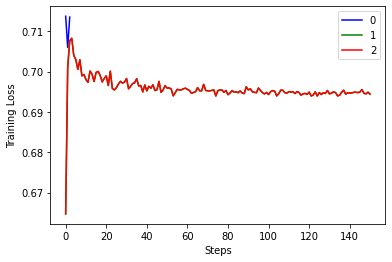

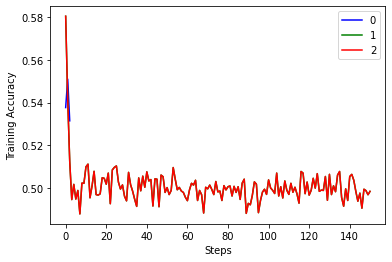

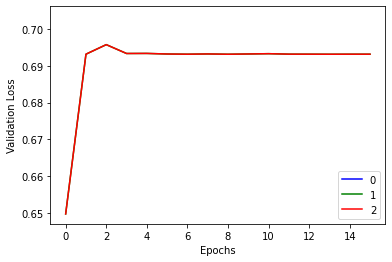

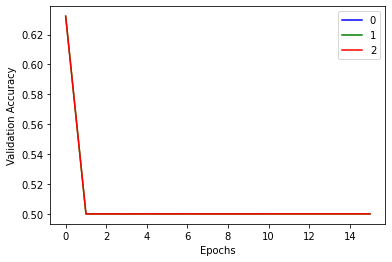

In [9]:
# Code to generate Plots from File
import matplotlib.pyplot as plt

file_paths = os.listdir('./results/')
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

file_paths_train = [file_name for file_name in file_paths if 'train' in file_name]
file_paths_validation = [file_name for file_name in file_paths if 'validation' in file_name]

# Train Loss Accuracy Load Data
train_losses = []
train_accuracies = []
for file_index in range(min(len(file_paths_train), len(colors))):
  train_loss = []
  train_accuracy = []
  file_name = file_paths_train[file_index]
  f = open('./results/{}'.format(file_name))
  lines = f.readlines()
  for line in lines:
    step, current_loss, current_accuracy = line.split(' ')
    train_loss.append(float(current_loss))
    train_accuracy.append(float(current_accuracy))
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  
# Train Loss Plot Data
for idx, train_loss in enumerate(train_losses):
  plt.plot(train_loss, colors[idx], label=idx)

plt.xlabel('Steps')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

# Train Accuracy Plot Data
for idx, train_accuracy in enumerate(train_accuracies):
  plt.plot(train_accuracy, colors[idx], label=idx)

plt.xlabel('Steps')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

# Train Loss Accuracy Load Data
val_losses = []
val_accuracies = []
for file_index in range(min(len(file_paths_validation), len(colors))):
  val_loss = []
  val_accuracy = []
  file_name = file_paths_validation[file_index]
  f = open('./results/{}'.format(file_name))
  lines = f.readlines()
  for line in lines:
    step, current_loss, current_accuracy = line.split(' ')
    val_loss.append(float(current_loss))
    val_accuracy.append(float(current_accuracy))
  val_losses.append(val_loss)
  val_accuracies.append(val_accuracy)
  
# Validation Loss Plot Data
for idx, val_loss in enumerate(val_losses):
  plt.plot(val_loss, colors[idx], label=idx)

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Validation Accuracy Plot Data
for idx, val_accuracy in enumerate(val_accuracies):
  plt.plot(val_accuracy, colors[idx], label=idx)

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Check How Many Duplicated Sentences we have

In [10]:
positive_data = []
with open(DATASET_FILE_TRAIN_POS, "r") as f:
  for x in f:
    positive_data.append(x)

negative_data = []
with open(DATASET_FILE_TRAIN_NEG, "r") as f:
  for x in f:
    negative_data.append(x)

print(len(positive_data))
positive_data = list(dict.fromkeys(positive_data))
print(len(positive_data))

print(len(negative_data))
negative_data = list(dict.fromkeys(negative_data))
print(len(negative_data))

1250000
1127644
1250000
1142838


## Preprocess test-set

In [11]:
test_data = []
with open(DATASET_FILE_TEST, "r") as f:
  for x in f:
    test_data.append(x)

encoded_test_data = []
for x in test_data:
  result, _ = pre_process_positive(tf.convert_to_tensor(x), 128)
  encoded_test_data.append(tf.reshape(tf.convert_to_tensor(result), (1,128)))
encoded_test_ds = tf.data.Dataset.from_tensor_slices(encoded_test_data)

## Predict test set

In [12]:
results = model.predict(encoded_test_ds)
labels = np.argmax(results, axis=1)

## Postprocessing

In [13]:
labels = [1 if x == 1 else -1 for x in labels]

#reverse labels
# labels = [-1 if x == 1 else 1 for x in labels]
#un-reverse labels
# labels = [1 if x == -1 else -1 for x in labels]

In [14]:
df = pd.DataFrame({'Id': np.arange(1,10001),
                  'Prediction': labels
                   })
df.to_csv(MODEL+identifier+'.csv', index=False)